# Introduction:

This project is for visualization of various features which the sales price of houses. Then data is taken from the "Kaggle House Price Prediction"

# Importing Necessary Libraries

In [2]:
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline
from sklearn import preprocessing

NOTE:
This special command %matplotlib inline to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.

# Restoring Data

Restoring Data
We use this function to restore data after running regressors.

In [7]:
def restoreData():
    data = pd.read_csv('train.csv')
    data['SalePriceLogarithm'] = np.log(data['SalePrice']) 
    replaceMissleadingNA()
    data.drop(['Utilities'], axis=1, inplace=True)
    data.drop(['Street'], axis=1, inplace=True)
    data.drop(['SalePrice'], axis=1, inplace=True)
    data.drop(['Id'], axis=1, inplace=True)
    return data

# Importing Data

In [8]:
data = pd.read_csv('train.csv')

Contents of file train.csv and was read using pd.read_csv and then stored in data dataframes.

Pandas describe is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Computing Percentage of Missing Values

In this part the combination of two Pandas methods (isnull and sum) is used in oreder to count number of missing values at each column.



In [11]:
def printMissingPercentage(data):
    missing_values = data.isnull().sum() * 100 / len(data)
    missing_values = pd.DataFrame({'Property': data.columns,
                                 'MissingValuesPercentage': missing_values})
    missing_values.sort_values('MissingValuesPercentage', inplace=True, ascending=False)
    missing_values.reset_index(inplace=True, drop=True)
    print(missing_values)

In [12]:
printMissingPercentage(data)

       Property  MissingValuesPercentage
0        PoolQC                99.520548
1   MiscFeature                96.301370
2         Alley                93.767123
3         Fence                80.753425
4   FireplaceQu                47.260274
..          ...                      ...
76    ExterQual                 0.000000
77  Exterior2nd                 0.000000
78  Exterior1st                 0.000000
79     RoofMatl                 0.000000
80    SalePrice                 0.000000

[81 rows x 2 columns]


# Computing Correlation between House Attributes

Pandas corr is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [14]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# Plotting Heatmap

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. We already know that if we have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

Text(0.5, 1.0, 'Multi-Collinearity of House Attributes')

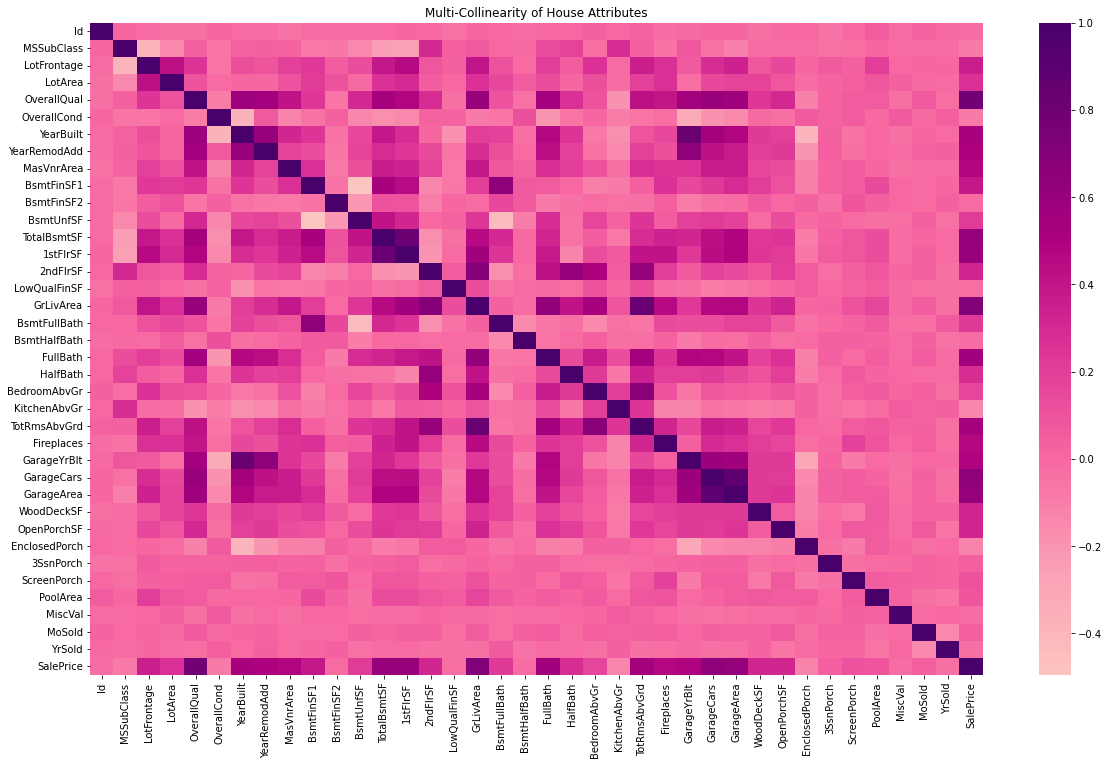

In [15]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(), center=0, cmap='RdPu')
ax.set_title('Multi-Collinearity of House Attributes')

# Applying Logarithmic Transformation

In [16]:
data['SalePriceLogarithm'] = np.log(data['SalePrice'])

In [17]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePriceLogarithm
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.355878
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.372023


In [21]:
target = 'SalePriceLogarithm'

# Matplotlib scatter method is used to show the relationship between two variables as dots in two dimensions, one axis for each attribute.

But there is a problem with this method, that it does not show the density of points.

In [22]:
def draw_scatter_plot(attribute, target, color):
    fig = plt.figure()
    plt.scatter(data[attribute], data[target], c = color)
    fig.suptitle('Correlation between ' + target + ' & ' + attribute , fontsize = 15)
    plt.xlabel(attribute, fontsize = 12)
    plt.ylabel(target, fontsize = 12)
    plt.show()

In [23]:
def draw_joint_plot(attribute, target, color):
    p = sns.jointplot(data=data, x=attribute, y=target, kind="hex", color=color)
    p.fig.subplots_adjust(top=0.95)
    p.fig.suptitle('Correlation between ' + target + ' & ' + attribute , fontsize = 15)

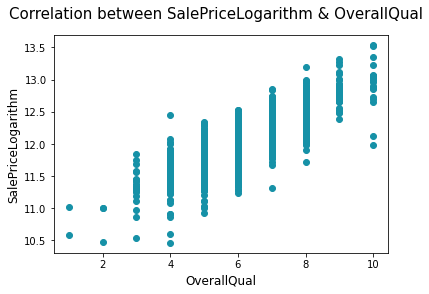

In [24]:
draw_scatter_plot('OverallQual', target, '#1691a7')

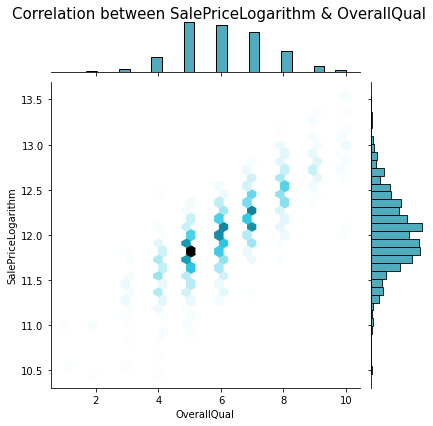

In [25]:
draw_joint_plot('OverallQual', target, '#1691a7')

# Plotting Categorical Attributes
Seaborn barplot method is basically used to aggregate the categorical data according to some methods and by default it's the mean. It can also be understood as a visualization of the group by action.

In [26]:
def draw_cat_plot(attribute, target):
    plot_order = data.groupby(attribute)[target].mean().sort_values(ascending=False).index.values
    sns.catplot(data=data, x=attribute, y=target, kind='bar', order=plot_order, ci=None)


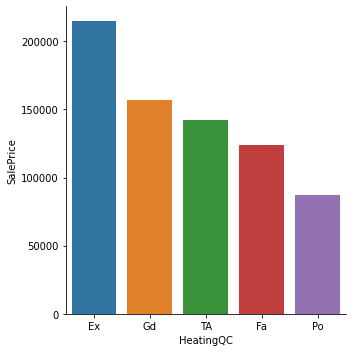

In [27]:
draw_cat_plot('HeatingQC', 'SalePrice')

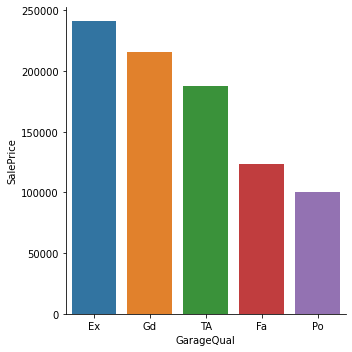

In [28]:
draw_cat_plot('GarageQual', 'SalePrice')

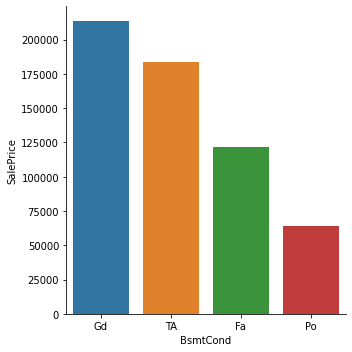

In [29]:
draw_cat_plot('BsmtCond', 'SalePrice')

In [30]:
def printEqualityPercent(attr1, attr2):
    diff = data[attr1].eq(data[attr2].values).mean()
    diff_percent = diff * 100
    print('Percentage of Equality:', str(diff_percent))

Now we find some data that have NA values but it does not mean missing value. So, we will change these values.

In [31]:
def replaceMissleadingNA():
    columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',\
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PoolQC',\
               'Fence', 'MiscFeature']
    for column in columns:
        data[column] = data[column].fillna('No')
    
    data['BsmtExposure'] = data['BsmtExposure'].fillna('No2')

In [32]:
replaceMissleadingNA()

In [33]:
printMissingPercentage(data)

              Property  MissingValuesPercentage
0          LotFrontage                17.739726
1          GarageYrBlt                 5.547945
2           GarageCond                 5.547945
3           MasVnrArea                 0.547945
4           MasVnrType                 0.547945
..                 ...                      ...
77           ExterCond                 0.000000
78           ExterQual                 0.000000
79         Exterior2nd                 0.000000
80         Exterior1st                 0.000000
81  SalePriceLogarithm                 0.000000

[82 rows x 2 columns]


In [34]:
data[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


 we can see that these three attributes are highly correlated. We will use this fact in handling NA values.

In [35]:
printEqualityPercent('GarageYrBlt', 'YearBuilt')

Percentage of Equality: 74.58904109589041


In [36]:
data[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd
GarageYrBlt,1.000000,0.825667,0.642277
YearBuilt,0.825667,1.000000,0.592855
YearRemodAdd,0.642277,0.592855,1.000000


removing columns that do not have any information gain

In [37]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

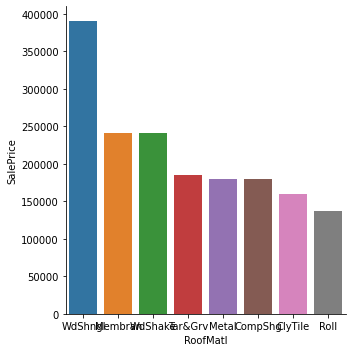

In [38]:
draw_cat_plot('RoofMatl', 'SalePrice')

In [39]:
data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [40]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

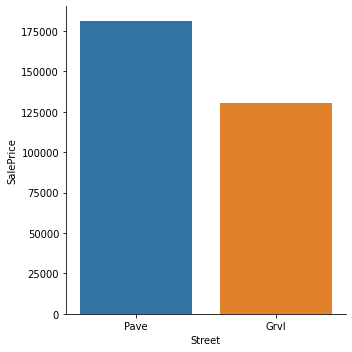

In [41]:
draw_cat_plot('Street', 'SalePrice')

# Standardizing Data


Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

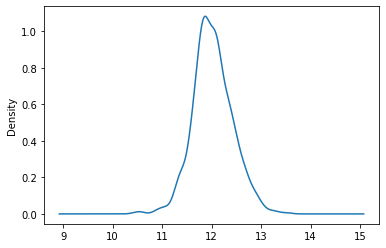

In [42]:
ax = data[target].plot.kde()

Here we plot the probability density function for target; this is done by using kde method. It is simillar to bell. Therefore, it has a normal distribution and we do not need to normalize it.